In [1]:
import sys
sys.path.append('/Users/sstk4353/Library/CloudStorage/OneDrive-UniversityofLeeds/PhD/.')

from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter

from pathlib import Path

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os
import math

import matplotlib.colorbar as cb

from sklearn.neighbors import KernelDensity, KDTree
from sklearn.model_selection import GridSearchCV

from scipy.stats import gaussian_kde

import seaborn as sns

sys.path.append('./')

In [2]:
from knn_distinction import KNNSeparator

In [3]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/WIPL results/' 

In [4]:
info_dict_C1020 = {
    'new_forest_cicada_body_only' : {
        'run_id' : 'cicadetta_finer_size_sweep_Cband_230126',
        'path' : BASE_DRIVE_PATH + 'cicadetta_montana_MfG/body_only1468/cicadetta_finer_size_sweep_Cband_230126.nc',
        'default_length' : 50,  
        'marker' : '.',   
    },
    'northern_damselfly_body_only' : {
        'run_id' : 'coenagrion_finer_size_sweep_Cband_230126',
        'path' : BASE_DRIVE_PATH + 'coenagrion_hastulatum_AGORA/body_only_remeshed1877/coenagrion_finer_size_sweep_Cband_230126.nc',
        'default_length' : 30,
        'marker' : 'o', 
    },
    'house_martin' : {
        'run_id' : 'delichon_finer_size_sweep_Cband_230126',
        'path' : BASE_DRIVE_PATH + 'delichon_urbicum_Reuben/remesh_and_decimate2007_no_tail/delichon_finer_size_sweep_Cband_230126.nc',
        'default_length' : 125,
        'marker' : 'x', 
    },
    'peregrine_falcon' : {
        'run_id' : 'peregrine_finer_size_sweep_Cband_230126.',
        'path' : BASE_DRIVE_PATH + 'falco_peregrinus_Reuben/full2704_no_tail/peregrine_finer_size_sweep_Cband_230126.nc',
        'default_length' : 500,
        'marker' : '+',      
    },
    'humming_bird_hawk_moth_body_only' : {
        'run_id' : 'hawkmoth_finer_size_sweep_Cband_230126',
        'path' : BASE_DRIVE_PATH + 'macroglossum_stellatarum_AGORA/body_only1568/hawkmoth_finer_size_sweep_Cband_230126.nc',
        'default_length' : 50,
        'marker' : '<',     
    },
    'hoverfly_1_body_only' : {
        'run_id' : 'mythropa_finer_size_sweep_Cband_230126',
        'path' : BASE_DRIVE_PATH + 'mythropa_florea_EvoBiomech/body_only1954/mythropa_finer_size_sweep_Cband_230126.nc',
        'default_length' : 15,
        'marker' : '>',
    },  
    'large_clearwing_body_only ' : {
        'run_id' : 'clearwing_finer_size_sweep_Cband_230126',
        'path' : BASE_DRIVE_PATH + 'synanthedon_culiciformis_AGORA/body_only1808/clearwing_finer_size_sweep_Cband_230126.nc',
        'default_length' : 14,
        'marker' : '^',     
    },
    'hoverly_2_body_only' : {
        'run_id' : 'temostoma_finer_size_sweep_Cband_230126',
        'path' : BASE_DRIVE_PATH + 'temostoma_vespiforme_AGORA/body_only1548/temostoma_finer_size_sweep_Cband_230126.nc',
        'default_length' : 15,
        'marker' : '*',      
    },
    'rhino_beetle_with_elytra' : {
        'run_id' : 'trypoxylus_finer_size_sweep_Cband_230126',
        'path' : BASE_DRIVE_PATH + 'trypoxylus_dichotomus_floraZia/body_and_elytra1332/trypoxylus_finer_size_sweep_Cband_230126.nc',
        'default_length' : 20,
        'marker' : 'h', 
    },
    'dragonfly_body_only' : {
        'run_id' : 'darter_finer_size_sweep_Cband_230126',
        'path' : BASE_DRIVE_PATH + 'sympetrum_parvulum_floraZia/body_only1772/darter_finer_size_sweep_Cband_230126.nc',
        'default_length' : 25,
        'marker' : '$:)$',      
    },
}

In [5]:
info_dict_C0 = {
    'new_forest_cicada_body_only' : {
        'run_id' : 'cicadetta_finer_size_sweep_130126',
        'path' : BASE_DRIVE_PATH + 'cicadetta_montana_MfG/body_only1468/cicadetta_finer_size_sweep_130126.nc',
        'default_length' : 50,  
        'marker' : '.',   
    },
    'northern_damselfly_body_only' : {
        'run_id' : 'coenagrion_finer_size_sweep_130126.',
        'path' : BASE_DRIVE_PATH + 'coenagrion_hastulatum_AGORA/body_only_remeshed1877/coenagrion_finer_size_sweep_130126.nc',
        'default_length' : 30,
        'marker' : 'o', 
    },
    'house_martin' : {
        'run_id' : 'delichon_finer_size_sweep_130126',
        'path' : BASE_DRIVE_PATH + 'delichon_urbicum_Reuben/remesh_and_decimate2007_no_tail/delichon_finer_size_sweep_130126.nc',
        'default_length' : 125,
        'marker' : 'x', 
    },
    'peregrine_falcon' : {
        'run_id' : 'peregrine_finer_size_sweep_130126.',
        'path' : BASE_DRIVE_PATH + 'falco_peregrinus_Reuben/full2704_no_tail/peregrine_finer_size_sweep_130126.nc',
        'default_length' : 500,
        'marker' : '+',      
    },
    'humming_bird_hawk_moth_body_only' : {
        'run_id' : 'hawkmoth_finer_size_sweep_130126',
        'path' : BASE_DRIVE_PATH + 'macroglossum_stellatarum_AGORA/body_only1568/hawkmoth_finer_size_sweep_130126.nc',
        'default_length' : 50,
        'marker' : '<',     
    },
    'hoverfly_1_body_only' : {
        'run_id' : 'mythropa_finer_size_sweep_130126',
        'path' : BASE_DRIVE_PATH + 'mythropa_florea_EvoBiomech/body_only1954/mythropa_finer_size_sweep_130126.nc',
        'default_length' : 15,
        'marker' : '>',
    },  
    'large_clearwing_body_only ' : {
        'run_id' : 'clearwing_finer_size_sweep_130126',
        'path' : BASE_DRIVE_PATH + 'synanthedon_culiciformis_AGORA/body_only1808/clearwing_finer_size_sweep_130126.nc',
        'default_length' : 14,
        'marker' : '^',     
    },
    'hoverly_2_body_only' : {
        'run_id' : 'temostoma_finer_size_sweep_130126',
        'path' : BASE_DRIVE_PATH + 'temostoma_vespiforme_AGORA/body_only1548/temostoma_finer_size_sweep_130126.nc',
        'default_length' : 15,
        'marker' : '*',      
    },
    'rhino_beetle_with_elytra' : {
        'run_id' : 'trypoxylus_finer_size_sweep_130126',
        'path' : BASE_DRIVE_PATH + 'trypoxylus_dichotomus_floraZia/body_and_elytra1332/trypoxylus_finer_size_sweep_130126.nc',
        'default_length' : 20,
        'marker' : 'h', 
    },
    'dragonfly_body_only' : {
        'run_id' : 'darter_finer_size_sweep_130126',
        'path' : BASE_DRIVE_PATH + 'sympetrum_parvulum_floraZia/body_only1772/darter_finer_size_sweep_130126.nc',
        'default_length' : 25,
        'marker' : '$:)$',      
    },
}

In [6]:
results_dict_C1020 = {key : xr.open_dataset(info_dict_C1020[key]['path']) for key in info_dict_C1020.keys()}
results_dict_C0 = {key : xr.open_dataset(info_dict_C0[key]['path']) for key in info_dict_C0.keys()}

results_dict_C = {}
ds_combined = None
for key in info_dict_C1020.keys():

    # ds_main = results_dict_C1020[key]
    # ds_fix  = results_dict_C0[key]

    # clean_0 = ds_fix.sel(pitch = 0)

    ds_combined = xr.concat(
    [results_dict_C0[key],
     results_dict_C1020[key],
    ],
    dim="pitch"
    ).sortby("pitch")

    results_dict_C[key] = ds_combined

In [7]:
kwargs = {
    'pitches' : [0,10,20],
    'Zdr_max' : 8,
    'Zdr_min' :-8,
    'phiT' : 30,
}


In [8]:
length_combos = [
    [2, 4, 6],
    [8, 10, 12],
    [14, 16, 18, 20 , 25],
    [35, 45, 50,75, 125, 200],
]


selector = KNNSeparator(
    results_dict_C,
    5.6,
    length_combos,
)

Delta Zdr and PhiDP required for separation #1: 0.16 dB, 3.6 degrees
Delta Zdr and PhiDP required for separation #2: 0.32 dB, 7.2 degrees
Count and proportion of points outside distance: 648 0.18035068188143613
Count and proportion of points outside distance: 1144 0.18877887788778877
Count and proportion of points outside distance: 2085 0.20758661887694146


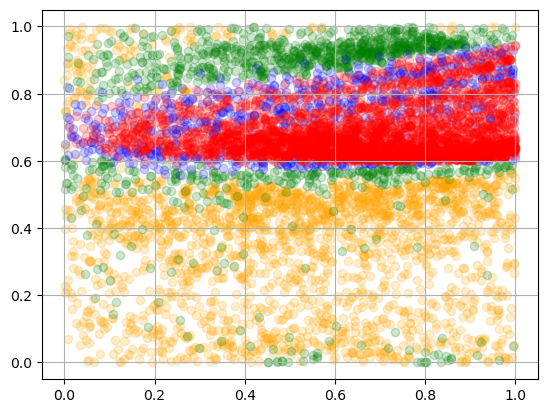

Calculating probability densities
Running grid search
Best bandwidth 0: 0.01373823795883263
Best bandwidth 1: 0.017433288221999882
Best bandwidth 2: 0.02807216203941177
Best bandwidth 3: 0.022122162910704492
Caching densities


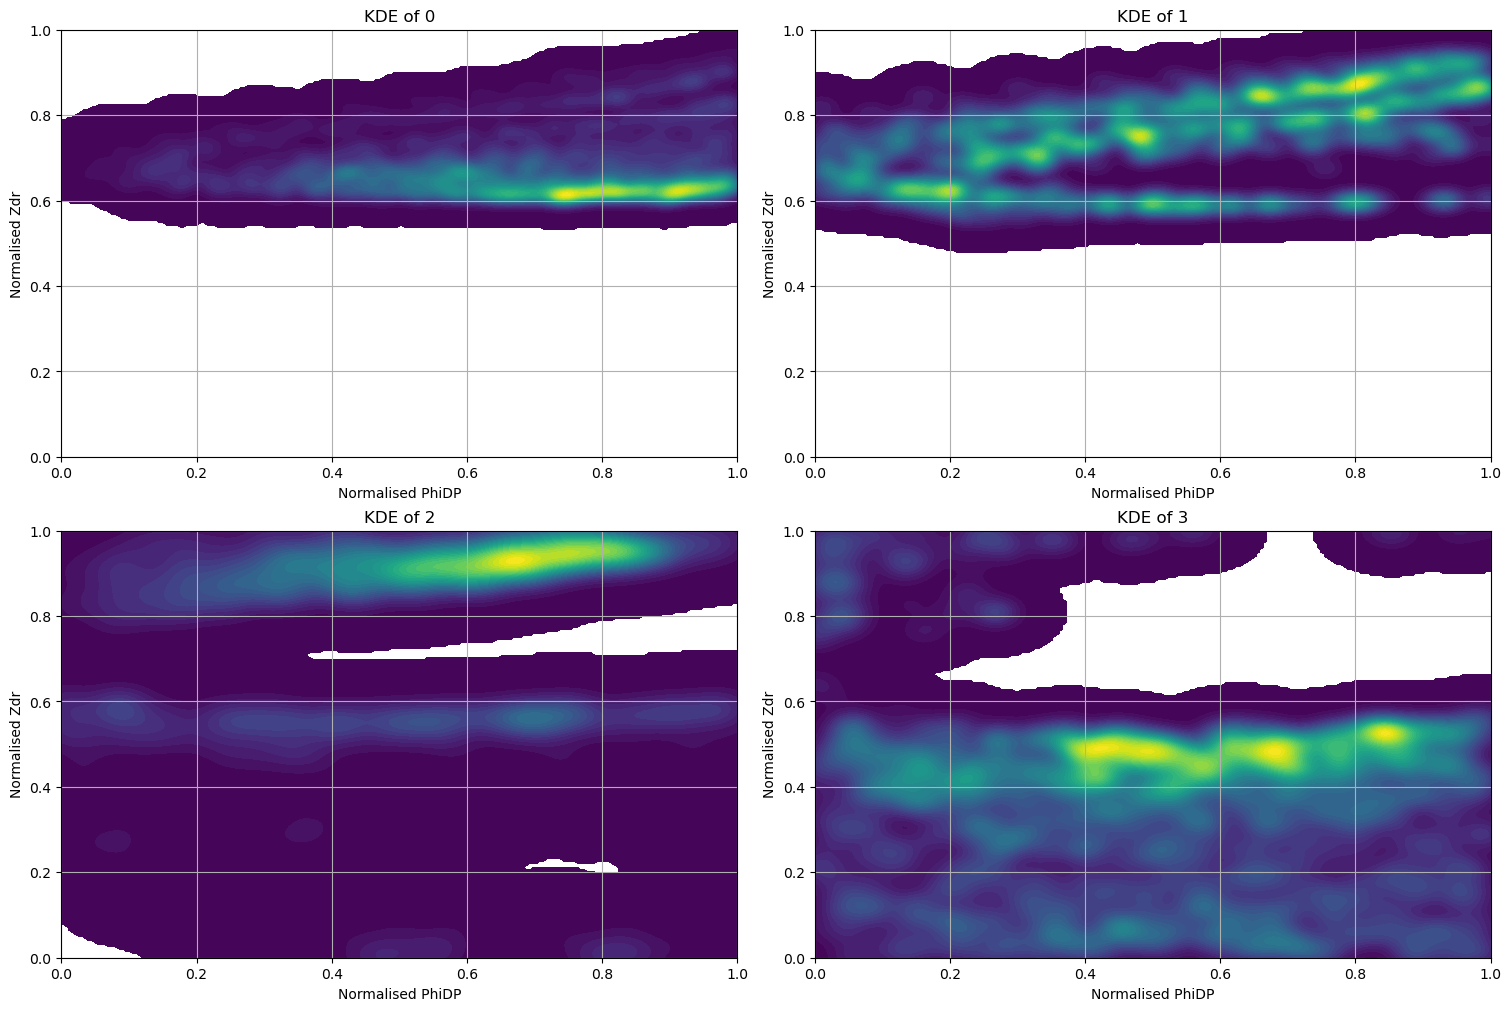

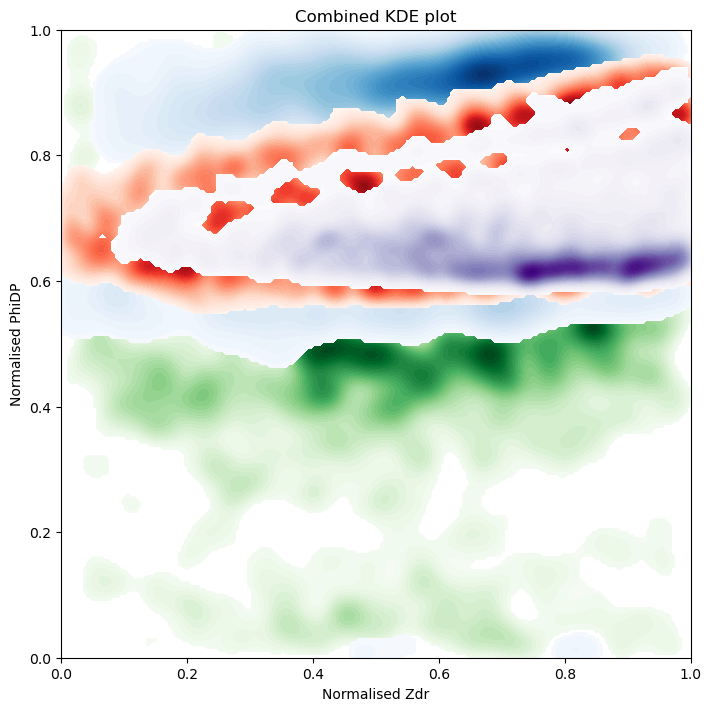

In [9]:
kwargs = {
    'pitches' : [0,10,20],
    'Zdr_max' : 8,
    'Zdr_min' :-8,
    'phiT' : 30,
}


selector.full_analysis(
   n_neighbours = 2,
   threshold_1=0.01,
   threshold_2=0.02,
   calculation_kwargs = kwargs
)

In [ ]:
selected_data = selector.quantify_category_distinction(
   n_neighbours = 2,
   threshold_1=0.01,
   threshold_2=0.02,
   calculation_kwargs = kwargs,
   return_data = True
)

Delta Zdr and PhiDP required for separation #1: 0.16 dB, 3.6 degrees
Delta Zdr and PhiDP required for separation #2: 0.32 dB, 7.2 degrees
Count and proportion of points outside distance: 648 0.18035068188143613
Count and proportion of points outside distance: 1144 0.18877887788778877
Count and proportion of points outside distance: 2085 0.20758661887694146


In [ ]:
print(selected_data)

[array([[0.40927219, 0.66170101],
       [0.41234361, 0.67053371],
       [0.4380974 , 0.68037143],
       ...,
       [0.4189841 , 0.61936891],
       [0.33633717, 0.62117485],
       [0.2550221 , 0.62482168]], shape=(3799, 2)), array([[0.90633212, 0.75189315],
       [0.7358472 , 0.74210681],
       [0.92239718, 0.76701078],
       ...,
       [0.35171875, 0.74678379],
       [0.23160242, 0.72686143],
       [0.26686977, 0.61472989]], shape=(648, 2)), array([[0.62045343, 0.88034784],
       [0.27129335, 0.84560291],
       [0.35505805, 0.88046913],
       ...,
       [0.28062348, 0.5711862 ],
       [0.43838753, 0.85181593],
       [0.67650308, 0.89930432]], shape=(1144, 2)), array([[0.72524703, 0.49530427],
       [0.67731706, 0.51086884],
       [0.22523523, 0.85197051],
       ...,
       [0.89421589, 0.5405794 ],
       [0.03495905, 0.35366416],
       [0.12862696, 0.90703906]], shape=(2085, 2))]


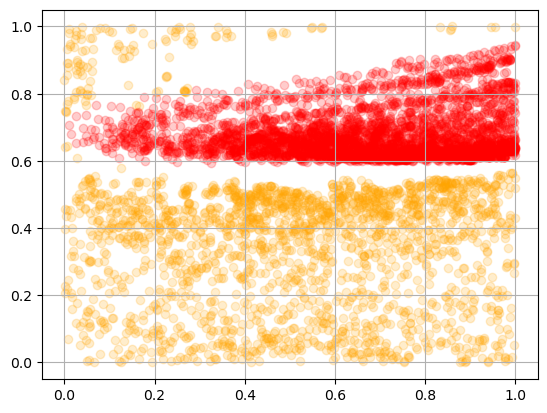

In [ ]:
selector.scatter_plot(indices_to_plot = [0,3])

Calculating probability densities
Running grid search
Best bandwidth 0: 0.01373823795883263
Best bandwidth 1: 0.017433288221999882
Best bandwidth 2: 0.02807216203941177
Best bandwidth 3: 0.022122162910704492
Caching densities


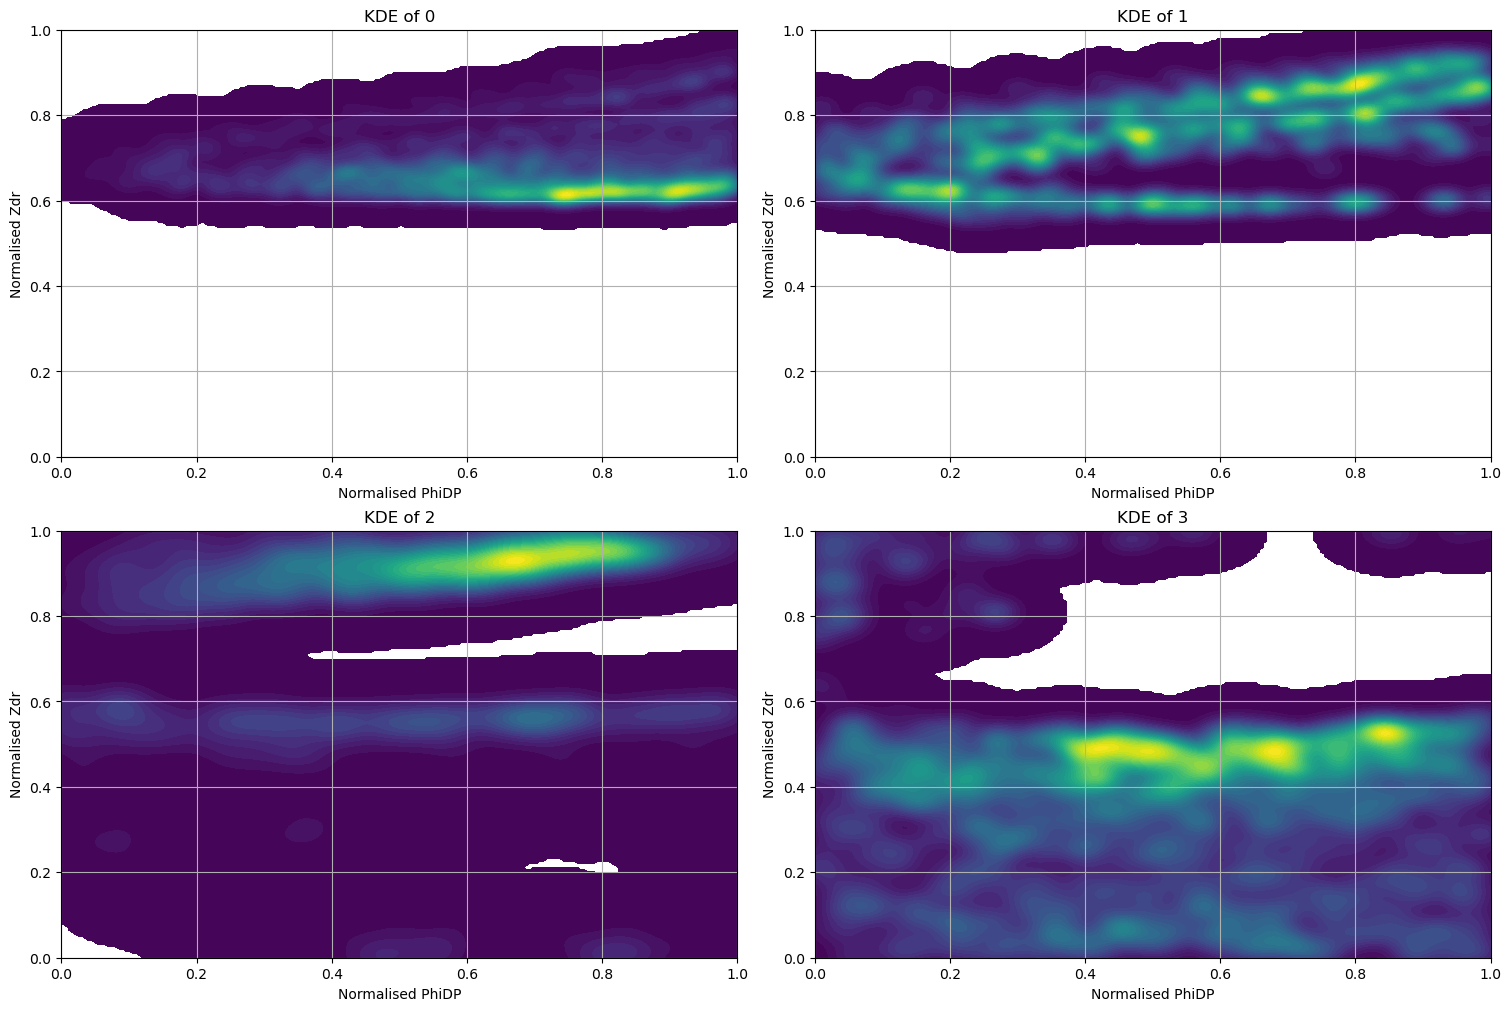

In [ ]:
selector.plot_KDEs_separate()

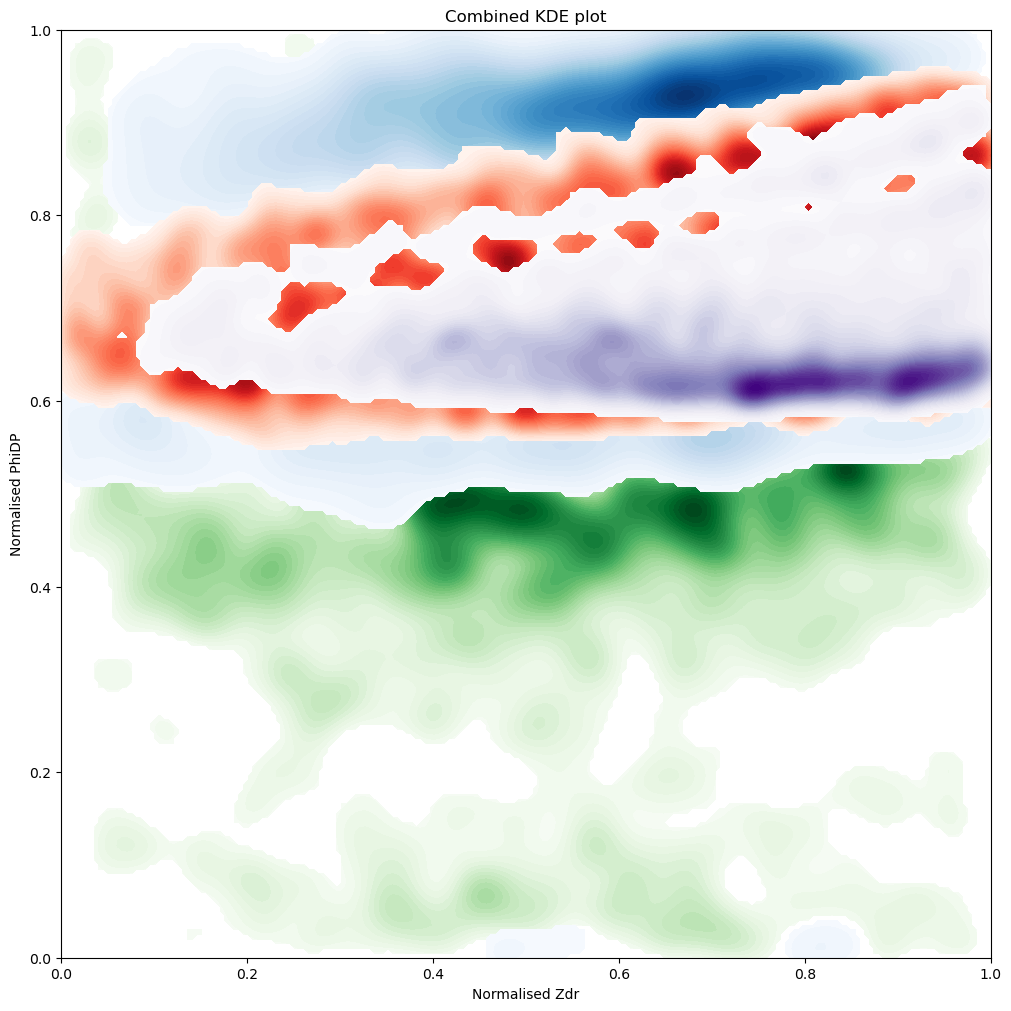

In [ ]:
selector.plot_KDEs_together(lower_threshold = 1)

In [ ]:
selector.last_densities[2]

array([[2.88456686e-10, 5.61077051e-10, 1.05709797e-09, ...,
        1.52320262e-01, 1.32895218e-01, 1.13541907e-01],
       [7.07295517e-10, 1.37552170e-09, 2.59115989e-09, ...,
        1.70421878e-01, 1.50202125e-01, 1.29777893e-01],
       [1.68006742e-09, 3.26659083e-09, 6.15232393e-09, ...,
        1.87369685e-01, 1.66971551e-01, 1.46000605e-01],
       ...,
       [1.47727388e-01, 1.54952051e-01, 1.58324612e-01, ...,
        9.92565599e-01, 8.67949788e-01, 7.44527444e-01],
       [1.29049198e-01, 1.35063755e-01, 1.37572351e-01, ...,
        8.94192480e-01, 7.82026915e-01, 6.70768267e-01],
       [1.09546900e-01, 1.14454451e-01, 1.16289435e-01, ...,
        7.85703499e-01, 6.87054156e-01, 5.89100173e-01]], shape=(200, 200))